In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
* Pclass : 승객 등급 1,2,3 등석
* Name, Sex, Age : 이름, 성별, 나이
* SibSp : 함께 탑승한 형제, 배우자의 수
* Parch : 함께 탑승한 자녀, 부모의 수
* Ticket : 티켓 아이디
* Fare : 티켓 요금 (파운드)
* Cabin : 객실 번호
* Embarked : 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

In [55]:
matplotlib.rc('font', family = 'NanumGothicCoding')

In [56]:
matplotlib.rc('font', family= 'NanumGothicCoding')
plt.rc('font', family = 'NanumGothicCoding')

In [57]:
plt.rcParams['axes.unicode_minus'] = False

### 데이터 정제_연습

* 운동에 따른 혈당산소요규량 데이터. 결측치 및 이상치를 확인하고 적절한 방법으로 처리
* => 결측 처리 변수: GENDER ,WEIGHT/ 이상치 처리 변수 : RSTPULSE
* 데이터 : FITNESS_결측.csv(변수:10개 , 자료수: 31개)

In [10]:
#데이터 불러오기
df_raw = pd.read_csv('/home/piai/Downloads/FITNESS_결측.csv', engine = 'python', encoding = "EUC-KR")
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


`김준오`

In [11]:
#결측치 확인
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [12]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [13]:
df_raw.info() #데이터 타입 확인 및 데이터 개수로 결측치 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    30 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    29 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [14]:
#범주형 변수 결측치 처리
df_raw['GENDER'].fillna('여성', inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [15]:
df_raw['GENDER'].value_counts()

여성    16
남성    15
Name: GENDER, dtype: int64

In [16]:
#연속형(숫자) 변수 결측치 처리: GENDER별 WEIGHT 평균 계산, 대체
df_raw.groupby('GENDER')['WEIGHT'].agg('mean')

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [17]:
#결측치에 평균 값 넣어주기
#방법1
df_raw['WEIGHT'].fillna(82.433, inplace = True)

#방법2
df_raw['WEIGHT'] = df_raw['WEIGHT'].fillna(df_raw.groupby('GENDER')['WEIGHT'].transform('mean')).round(3)

df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [18]:
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

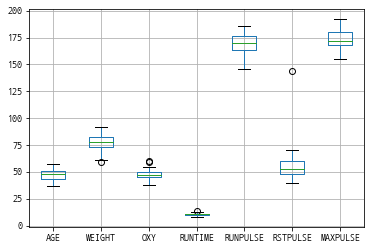

In [19]:
#이상치 확인 및 처리: boxplot 이용한 이상치 확인
df_raw.boxplot()

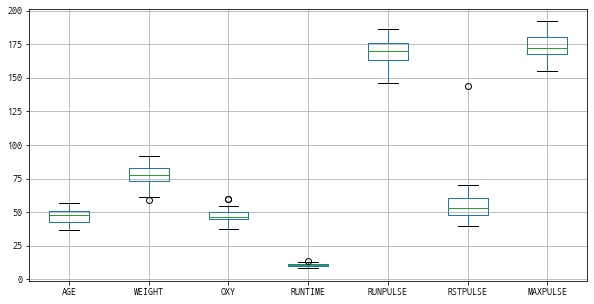

In [20]:
#boxplot 그리기 = figsize : 그래프 크기 (x축, y축)
df_raw.boxplot(figsize = (10,5))

In [21]:
df_raw[df_raw['RSTPULSE']>=100]

#복수조건일경우
#df_raw[(df_raw['RSTPULSE']>=100) & (df_raw['GENDER'] == '남성')] 

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [22]:
#이상치 제거
df_fitness = df_raw[df_raw['RSTPULSE'] < 100]  #100이하의 데이터만 불러오기
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [23]:
#자료 reset_index (drop =True : 인덱스 열을 버림)

df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [24]:
#scale 변환 : scale 변환 대상 변수 = 숫자형 변수 (문자형 변수는 적용되지 않음)
#숫자형 변수 선택 : select_dtypes = 'object' 제외
df_fitness_num = df_fitness.select_dtypes(exclude = 'object')
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [25]:
#문자형 변수 선택 : select_dtypes = 'object' 선택
df_fitness_char = df_fitness.select.dtypes(include = 'object')
df_fitness_char.head()

AttributeError: 'DataFrame' object has no attribute 'select'

In [26]:
#scale 변환 : 평균 , 표준편차 기준
df_scale_std = scale(df_fitness_num)

In [27]:
#scale 적용, 변환하면 numpy의 ndarray 형태로 저장 -> DataFrame 으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.806,-1.119,2.335,-1.772,-0.361,-1.857,-0.200
1,-1.507,0.607,2.429,-1.423,0.029,-0.778,1.329
2,-0.631,1.106,1.302,-1.408,-1.337,-1.182,-0.637
3,0.596,-0.777,1.366,-1.204,-2.313,-0.778,-2.056
4,0.421,0.678,0.295,-1.181,1.005,-1.317,1.219


In [28]:
#scale 변환 결과 확인 : 요약통계량
df_scale_std.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [29]:
#scale 변환 (minmax_scale 최소=0, 최대 =1)

#scale 변환 : 최소, 최대값 기준
df_scale_minmax = minmax_scale(df_fitness_num)

#DataFrame 으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.279,0.979,0.000,0.50,0.000,0.459
1,0.05,0.700,1.000,0.078,0.60,0.267,0.838
2,0.30,0.822,0.746,0.082,0.25,0.167,0.351
3,0.65,0.362,0.760,0.128,0.00,0.267,0.000
4,0.60,0.717,0.519,0.133,0.85,0.133,0.811


In [30]:
#scale 변환 결과 확인 : 요약통계량

df_scale_minmax.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [31]:
#scale 변환 (robust_scale, 중앙값 = 0, IQR = 1 변환)
#scale 변환: 로버스트 기준
df_scale_robust = robust_scale(df_fitness_num)

#scale 적용하면 numpy의 ndarray 형태로 저장 - > dataframe 으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [32]:
#scale 변환 결과 확인 : 요약통계량
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [33]:
df_rstpulse = pd.DataFrame()
df_rstpulse['Raw'] = df_fitness_num['RSTPULSE']
df_rstpulse['Standard'] = df_scale_std['RSTPULSE']
df_rstpulse['MinMax'] = df_scale_minmax['RSTPULSE']
df_rstpulse['Robust'] = df_scale_robust['RSTPULSE']
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [34]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5693f3dc40>,
      dtype=object)

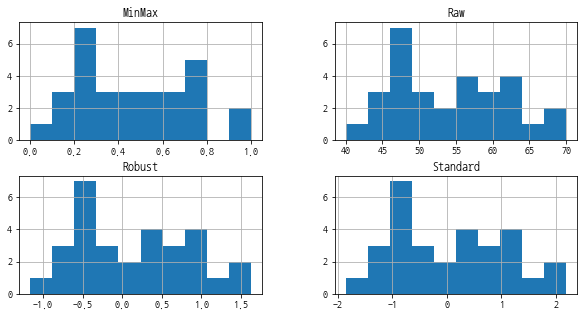

In [35]:
df_rstpulse[['Raw','Standard','MinMax','Robust']].hist(figsize = (10,5))

`^a^`

`^0^`

`\^0^/`

`@-@`

### 탐색적 분석

In [36]:
df_fitness = pd.read_csv('/home/piai/Downloads/FITNESS.csv' , engine = 'python', encoding = "EUC-KR")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [37]:
df_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    31 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    31 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [38]:
df_fitness.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

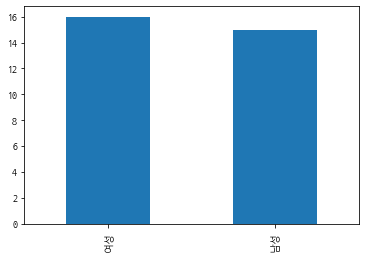

In [39]:
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()

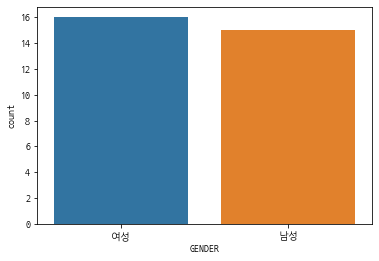

In [40]:
sns.countplot(x = 'GENDER', data = df_fitness)

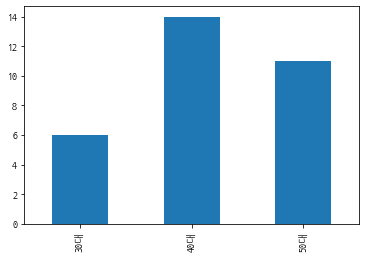

In [41]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.sort_index(inplace = True)
df_count.plot.bar()

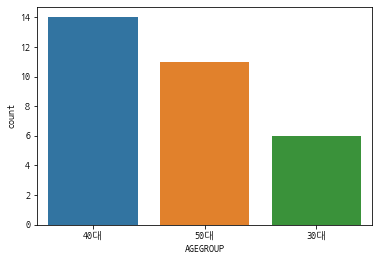

In [42]:
sns.countplot(x ='AGEGROUP', data= df_fitness, order = df_fitness['AGEGROUP'].value_counts().index)

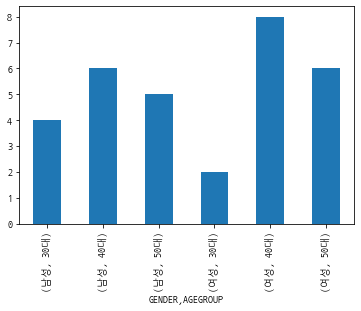

In [43]:
#복수의 범주형 변수의 자료수 통합계산
#groupby(column) colunm 기준 자료 요약 as_index :groupby 변수와 index 로 사용 여부
df_groupby_total = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index = False).size()
df_groupby_total.plot.bar()

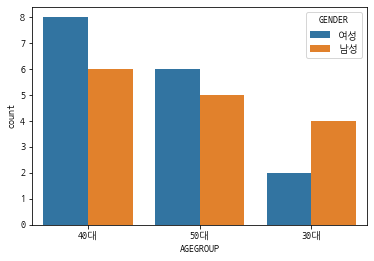

In [44]:
sns.countplot(x='AGEGROUP', hue = 'GENDER', 
              data = df_fitness, order = df_fitness['AGEGROUP'].value_counts().index)

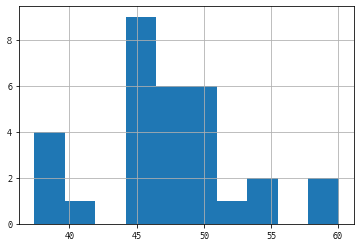

In [45]:
#Histogram 생성
df_fitness['OXY'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5693a15280>,
      dtype=object)

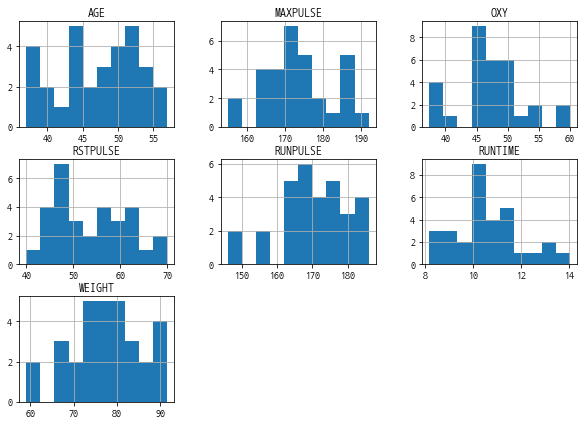

In [46]:
df_fitness.hist(figsize = (10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56930c28b0>,
      dtype=object)

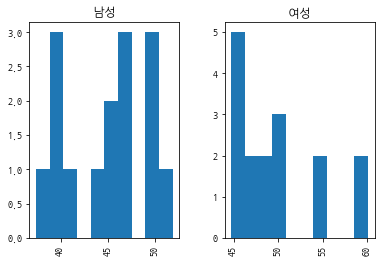

In [68]:
df_fitness.hist(column = 'OXY', by = 'GENDER')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5692fe7130>,
      dtype=object)

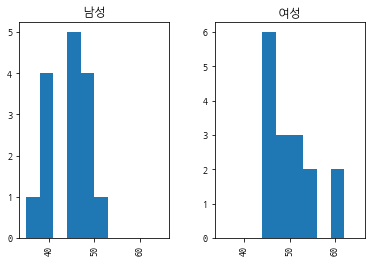

In [69]:
#성별 혈당 산소요구량 , hist(column = 변수, by = 그룹변수)
df_fitness.hist(column = 'OXY', by = 'GENDER', range = (35,65))

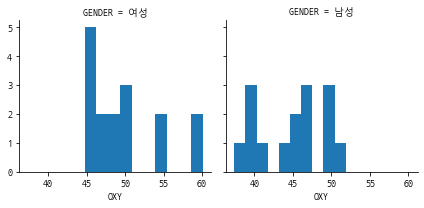

In [70]:
grid = sns.FacetGrid(df_fitness, col='GENDER')
grid.map(plt.hist,'OXY')

Text(0.5, 1.0, '여성 VS 남성, 혈당 산소요구량')

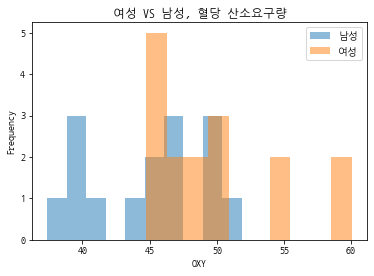

In [59]:
plt.hist(df_fitness[df_fitness['GENDER'] == '남성']['OXY'],label = '남성', alpha = 0.5)
plt.hist(df_fitness[df_fitness['GENDER'] == '여성']['OXY'],label = '여성', alpha = 0.5)
plt.legend()
plt.xlabel('OXY')
plt.ylabel('Frequency')
plt.title('여성 VS 남성, 혈당 산소요구량')

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

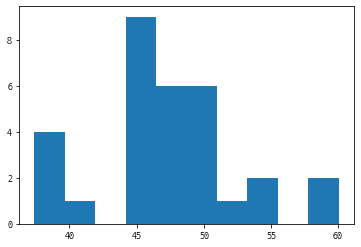

In [63]:
#hist(변수, data)
plt.hist(x = 'OXY', data = df_fitness)

(array([ 5.,  3., 12.,  7.,  2.,  2.]),
 array([37.388     , 41.16583333, 44.94366667, 48.7215    , 52.49933333,
        56.27716667, 60.055     ]),
 <a list of 6 Patch objects>)

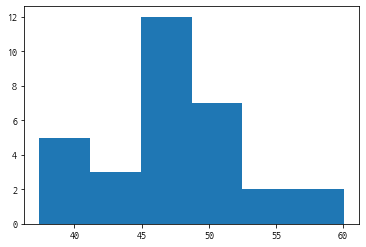

In [64]:
#x축 구간(bin) 조정(상세 분포 확인)
plt.hist(x = 'OXY', data = df_fitness, bins = 6)

In [72]:
#OXY 이상치 (55보다 큰 값) 확인
df_fitness[(df_fitness['OXY']>55)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186


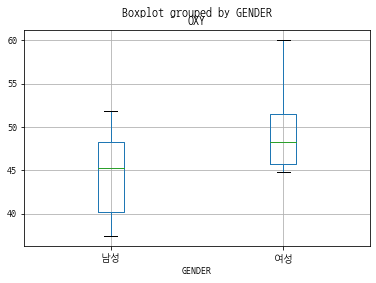

In [73]:
df_fitness.boxplot(column = 'OXY', by = 'GENDER')

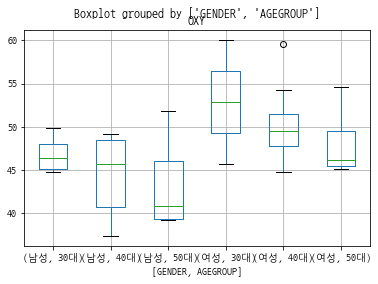

In [71]:
#성별 + 연령대에 대한 혈당 산소 요구량 분포 (column = 변수, by = 그룹변수)
df_fitness.boxplot(column = 'OXY', by = ['GENDER', 'AGEGROUP'])

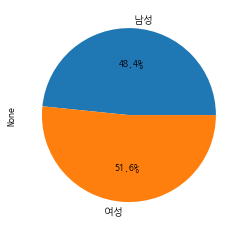

In [76]:
# 성별 PIE CHART
df_count = df_fitness.groupby(['GENDER']).size()
df_count.plot.pie(y = 'OXY', autopct = "%.1f%%")

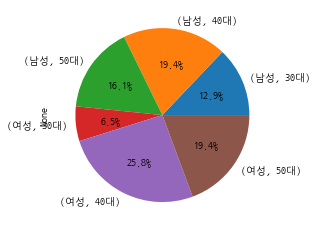

In [80]:
# 성별 + 연령대 pie chart
df_count = df_fitness.groupby(['GENDER', 'AGEGROUP']).size()
df_count.plot.pie(y = 'OXY', autopct = '%.1f%%')

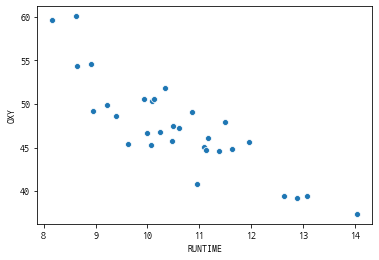

In [82]:
#seaborn.scatterplot method 이용
#scatterplot(x,y,hue : 그룹변수 , style : 그룹별 marker 구분, data)
sns.scatterplot(x = 'RUNTIME', y = 'OXY', data = df_fitness)

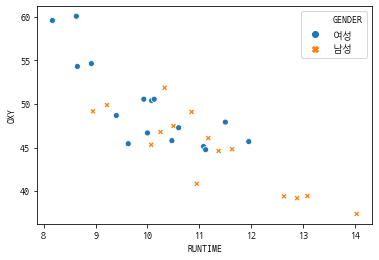

In [81]:
#seaborn.scatterplot method 이용
#scatterplot(x,y,hue : 그룹변수 , style : 그룹별 marker 구분, data)
#gender를 색으로 구분!
sns.scatterplot(x = 'RUNTIME', y = 'OXY', hue = 'GENDER', style = 'GENDER', data = df_fitness)

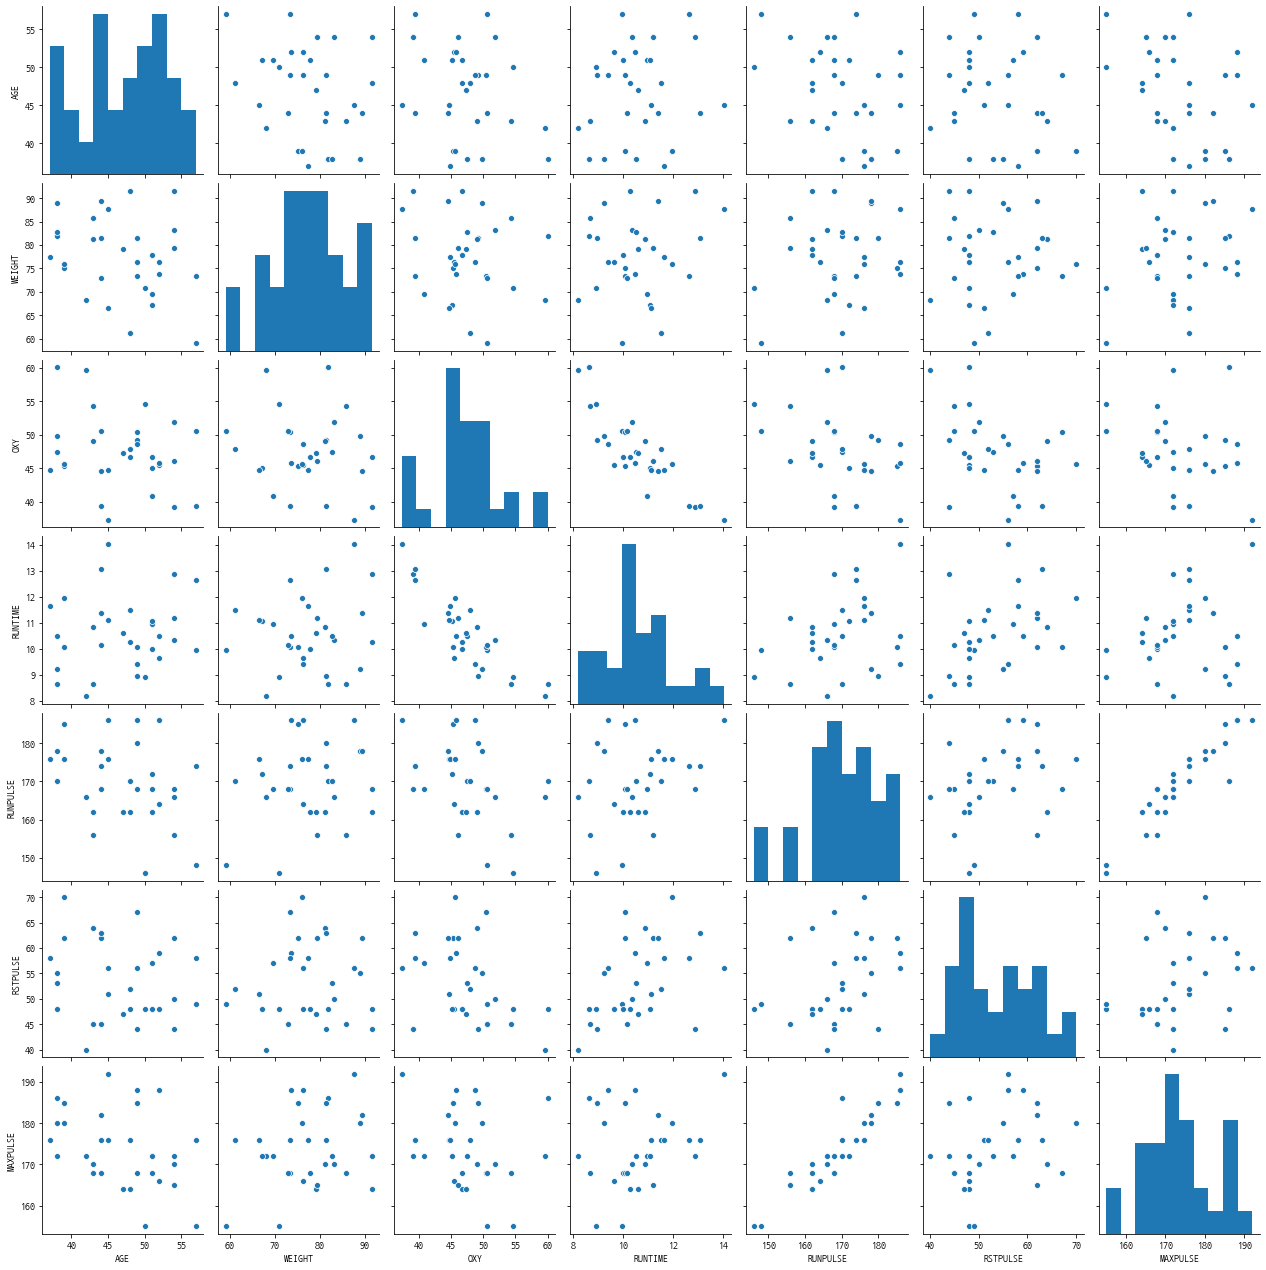

In [83]:
sns.pairplot(df_fitness)

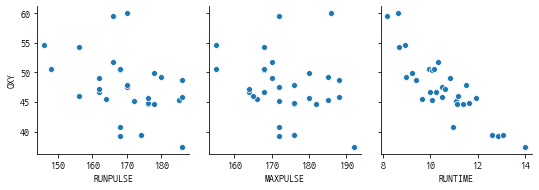

In [84]:
#전체 그림에서 관련변수 재확인
sns.pairplot(y_vars = ['OXY'], x_vars = ['RUNPULSE','MAXPULSE','RUNTIME'], data =df_fitness)

In [103]:
#trend chart
df_currency= pd.read_csv('/home/piai/Downloads/환율.csv', engine = 'python', parse_dates = ['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [104]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CURRENCY       273 non-null    object        
 1   APPL_DATE      273 non-null    datetime64[ns]
 2   STD_RATE       273 non-null    float64       
 3   USD_CONV_DATE  273 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.7+ KB


In [105]:
df_currency_pivot = df_currency.pivot(index = 'APPL_DATE', columns = 'CURRENCY', values = 'STD_RATE')
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


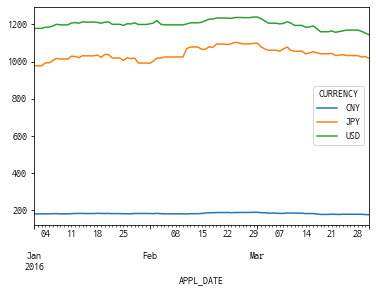

In [106]:
#중국 위안, 일본 엔화, 미국 달러 전체 그림(엔화, 달러와 단위 차이)
df_currency_pivot.plot()

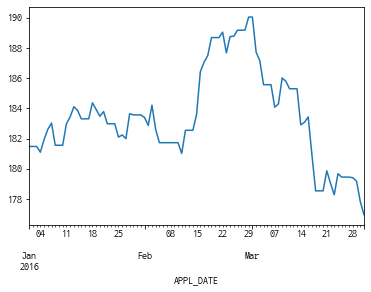

In [109]:
df_currency_pivot['CNY'].plot()

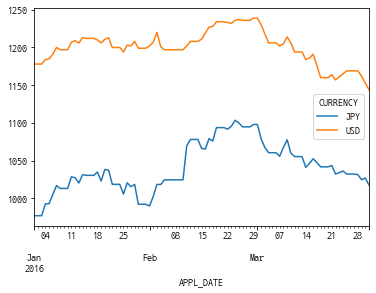

In [108]:
df_currency_pivot[['JPY','USD']].plot()

In [112]:
df_fitness.tail()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,44,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176
30,William,남성,45,40대,87.66,37.388,14.03,186,56,192


In [114]:
#heatmap
#성별/ 연령대별 혈당산소요구량 평균 계산, as_index: groupby 변수의 index 로 사용 여부
#groupby : (성별, 연령).agg('mean') : 혈당 산소 요구량 평균값

df_agg = df_fitness.groupby(['GENDER','AGEGROUP'], as_index = False).agg('mean')

#pivot (y축 성별, x축 연령대, 값(혈당산소요구량의 평균)으로 pivot
df_pivot = df_agg.pivot('GENDER','AGEGROUP','OXY')
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


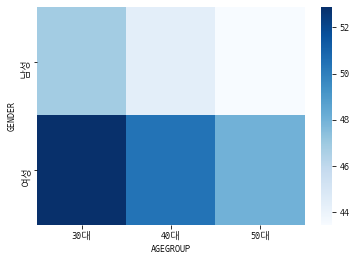

In [123]:
#heatmap(데이터, cmap : 색상)
sns.heatmap(df_pivot, cmap = 'Blues') #Blues, Greens, Accent_r, coolwarm_r, magma_r

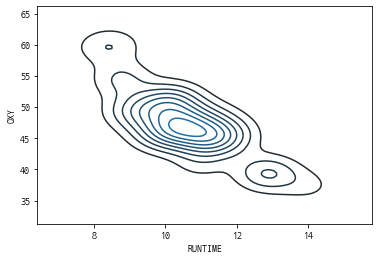

In [126]:
#contour plot
#kdeplot x축, y축 shade : 음영 선택 여부
sns.kdeplot(df_fitness['RUNTIME'], df_fitness['OXY'],shade = False)

#파이썬 에서는 x,y축 값에 따른 밀도 수준을 표현

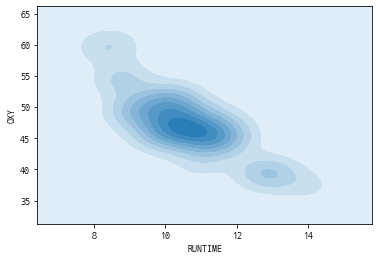

In [125]:
#음영 주기
sns.kdeplot(df_fitness['RUNTIME'], df_fitness['OXY'],shade = True)

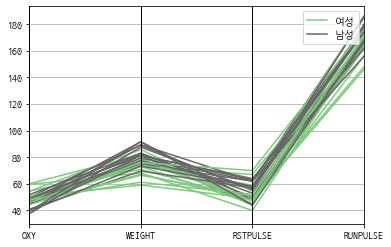

In [134]:
#parallel plot 
#parallel_coordinates(데이터, 그룹 변수, cols = 변수)
#colormap = 다양한 colormap 지정: cool, Accent, prism, rainbow
pd.plotting.parallel_coordinates(df_fitness, 'GENDER',
                                 cols = ['OXY','WEIGHT','RSTPULSE','RUNPULSE'], 
                                 colormap = 'Accent')

### Customizing 

Text(486.6727272727271, 0.5, '혈당 산소 요구량')

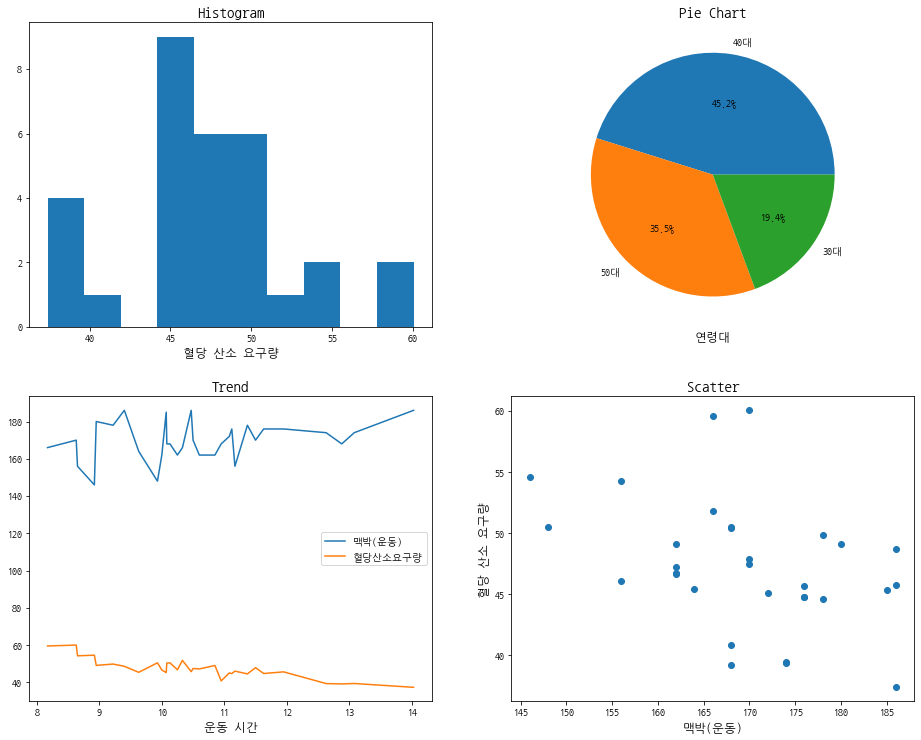

In [140]:
#AGEGROUP에 대해 pie chart 작성을 위한 집계 데이터
df_count = df_fitness['AGEGROUP'].value_counts()

#4개의 그래프 생성 (2,2) 4분할
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13,10))

#w_pad : 열 사이 간격 ㅡ h_pad : 행 사이 간격
plt.tight_layout(w_pad = 5, h_pad =5)

#[0,0]위치에 histogram 생성(혈당 산소 요구량)
axes[0,0].hist(df_fitness['OXY'])
axes[0,0].set_title('Histogram',fontsize = 15)
axes[0,0].set_xlabel('혈당 산소 요구량', fontsize = 12)

#[0,1]위치에 pie char 생성(연령대 구성비)
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = '%.1f%%')
axes[0,1].set_title('Pie Chart', fontsize = 15)
axes[0,1].set_xlabel('연령대', fontsize = 12)

#[1,0]위치에 trend chart 생성(운동시간별 맥박과 혈당산소요구량 추이)
axes[1,0].plot('RUNTIME','RUNPULSE',data = df_fitness, label = '맥박(운동)')
axes[1,0].plot('RUNTIME','OXY',data = df_fitness, label = '혈당산소요구량')
axes[1,0].set_title('Trend', fontsize = 15)
axes[1,0].set_xlabel('운동 시간', fontsize = 12)
axes[1,0].legend()

#[1,1]위치에 scatter plot 생성(운동 후 맥박과 산소요구량의 상관성 분석)
axes[1,1].scatter('RUNPULSE','OXY',data = df_fitness)
axes[1,1].set_title('Scatter', fontsize = 15)
axes[1,1].set_xlabel('맥박(운동)', fontsize = 12)
axes[1,1].set_ylabel('혈당 산소 요구량', fontsize = 12)